# Data Science Project - Wine Rating & Price
## Numan SAHNOU & Matthieu ECCHER
***

Our dataset is about wine. Wine all over the world with several features.
<br> This dataset is from __Vivino.com__, a mobile-based social media platform that brings together a community of wine lovers.
<br> Basically, as a user, you snap a photo of the wine label, the app recognizes the wine and saves it, after that, you review and rate the wine. 

__Description of the dataset__ :

* Name of the bottle<br>
* Country of provenance<br>
* Region in the country<br>
* Winery int the region<br>
* Rating of the bottle 0 to 5 step 0.1<br>
* Number of Ratings : the number of people which give a grade to the bottle<br>
* Price of 1 bottle<br>
* Year of production<br>
* Type of the wine (Red, White, Rosé, Sparkling)<br>


### Loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

red = pd.read_csv('Red.csv')
white = pd.read_csv('White.csv')
sparkling = pd.read_csv('Sparkling.csv')
rose = pd.read_csv('Rose.csv')

red['Type'] = "Red"
white['Type'] = "White"
sparkling['Type'] = "Sparkling"
rose['Type'] = "Rose"

frames = [red, white, sparkling, rose]

wine = pd.concat(frames, ignore_index=True)

wine

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,Rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,Rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,Rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,Rose


### Encode variables

We can observe in the dataframe that we have some "N.V." values in the __Year__ field. <br>
"N.V." is used to describe __non vintage__ wine. It describe a blend from product that have two or more different years value. <br>
So we have to replace that value in the dataset by any value of year that is not present in the list before. 

In [ ]:
wine['Year'].value_counts()
# We have 744 Non Vintage wines over 13834 different wines which represent 5.37 % of the dataset 
# We assume that this proportion is acceptable and will not affect too much our result

wine['Year'] = wine['Year'].replace('N.V.', 2021) #We replace N.V. value by 2021 (Happy new year)
wine['Year'] = wine['Year'].astype('int') #By the way we can now define Year as an Integer feature to exploit the data

wine

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,Rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,Rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,Rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2021,Rose


### Data Visualization

__Description__

In [ ]:
wine.describe()

,Rating,NumberOfRatings,Price,Year
count,13834.000000,13834.000000,13834.000000,13834.000000
mean,3.865664,428.322466,33.024850,2015.825864
std,0.296427,1838.413812,70.899893,3.417539
min,2.200000,25.000000,3.150000,1961.000000
25%,3.700000,56.000000,9.902500,2015.000000
50%,3.900000,129.000000,15.950000,2016.000000
75%,4.100000,336.000000,32.500000,2018.000000
max,4.900000,94287.000000,3410.790000,2021.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 972.8+ KB


__Type of wine represented__ <br>



Which __Type__ is the most respresented ? 

[Text(0, 0, 'Red'),
 Text(1, 0, 'White'),
 Text(2, 0, 'Sparkling'),
 Text(3, 0, 'Rose')]

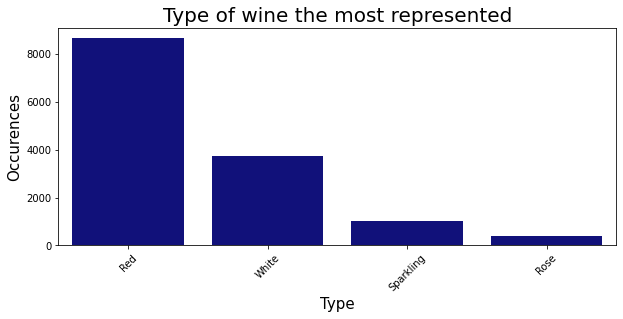

In [ ]:
plt.figure(figsize=(10,4))

types = wine.Type.value_counts()

graph = sns.countplot(x='Type', 
                  data=wine[wine.Type.isin(types.index.values)],
                 color='darkblue')
graph.set_title("Type of wine the most represented", fontsize=20)
graph.set_xlabel("Type", fontsize=15)
graph.set_ylabel("Occurences", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

Which __Type__ is the mosted tested, liked, expensive in general.


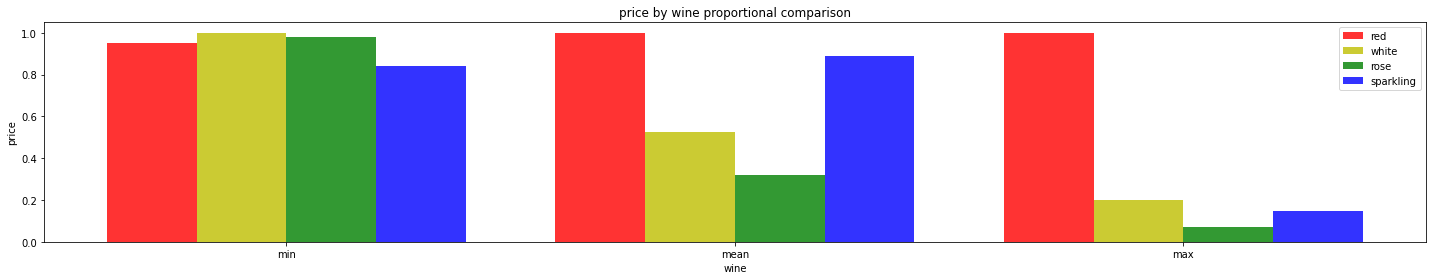

In [ ]:
test =red.describe()
test2= white.describe()
test3 =rose.describe()
test4= sparkling.describe()

import matplotlib.pyplot as plt

# data to plot
n_groups = 3
red_test = (test.loc['min','Price']/test2.loc['min','Price'],test.loc['mean','Price']/test.loc['mean','Price'],test.loc['max','Price']/test.loc['max','Price'])
white_test = (test2.loc['min','Price']/test2.loc['min','Price'],test2.loc['mean','Price']/test.loc['mean','Price'],test2.loc['max','Price']/test.loc['max','Price'])
rose_test = (test3.loc['min','Price']/test2.loc['min','Price'],test3.loc['mean','Price']/test.loc['mean','Price'],test3.loc['max','Price']/test.loc['max','Price'])
sparkling_test = (test4.loc['min','Price']/test2.loc['min','Price'],test4.loc['mean','Price']/test.loc['mean','Price'],test4.loc['max','Price']/test.loc['max','Price'])


# create plot
plt.figure(figsize=(20,4))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, red_test, bar_width,
alpha=opacity,
color='r',
label='red')

rects2 = plt.bar(index + bar_width, white_test, bar_width,
alpha=opacity,
color='y',
label='white')

rects3 = plt.bar(index + bar_width+ bar_width, rose_test, bar_width,
alpha=opacity,
color='g',
label='rose')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, sparkling_test, bar_width,
alpha=opacity,
color='b',
label='sparkling')

plt.xlabel('wine')
plt.ylabel('price')
plt.title('price by wine proportional comparison')
plt.xticks(index+bar_width*1.5, ('min', 'mean', 'max'))


plt.legend()

plt.tight_layout()
plt.show()

The price by __Type__ of wine

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0.0, '1'),
 Text(0, 1.0, '2'),
 Text(0, 2.0, '7'),
 Text(0, 3.0, '20'),
 Text(0, 4.0, '54'),
 Text(0, 5.0, '148'),
 Text(0, 6.0, '403'),
 Text(0, 7.0, '1096'),
 Text(0, 8.0, '2980'),
 Text(0, 9.0, '8103')]

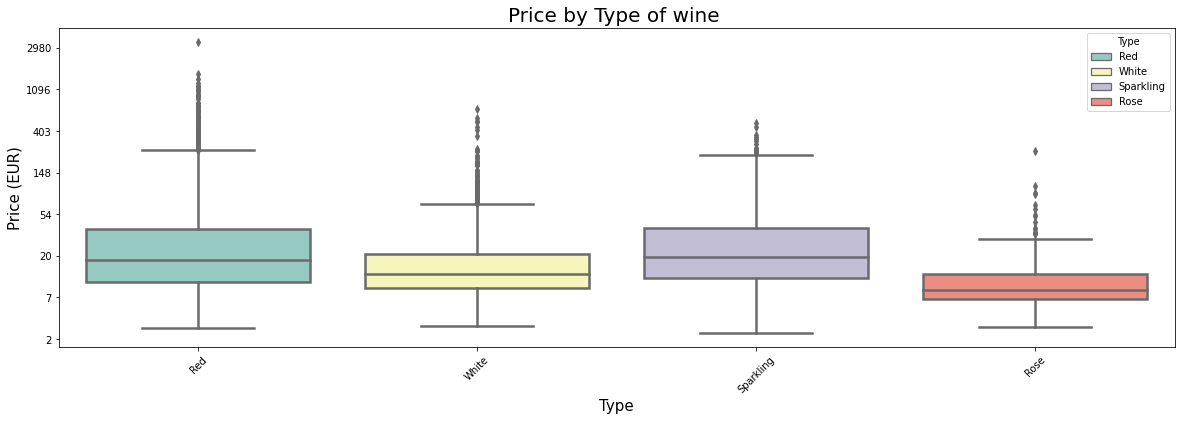

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
graph = sns.boxplot(x='Type', y=np.log(wine['Price']),
                    data=wine,
                    palette="Set3",  hue="Type", linewidth=2.5, dodge=False)
graph.set_title("Price by Type of wine ", fontsize=20)
graph.set_xlabel("Type", fontsize=15)
graph.set_ylabel("Price (EUR)", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


Rating by __type__ of wine (does some type of wine have better review than others ?)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0.7000000000000001, '2'),
 Text(0, 0.8, '2'),
 Text(0, 0.9000000000000001, '2'),
 Text(0, 1.0, '2'),
 Text(0, 1.1, '3'),
 Text(0, 1.2000000000000002, '3'),
 Text(0, 1.3000000000000003, '3'),
 Text(0, 1.4000000000000001, '4'),
 Text(0, 1.5, '4'),
 Text(0, 1.6, '4'),
 Text(0, 1.7000000000000002, '5')]

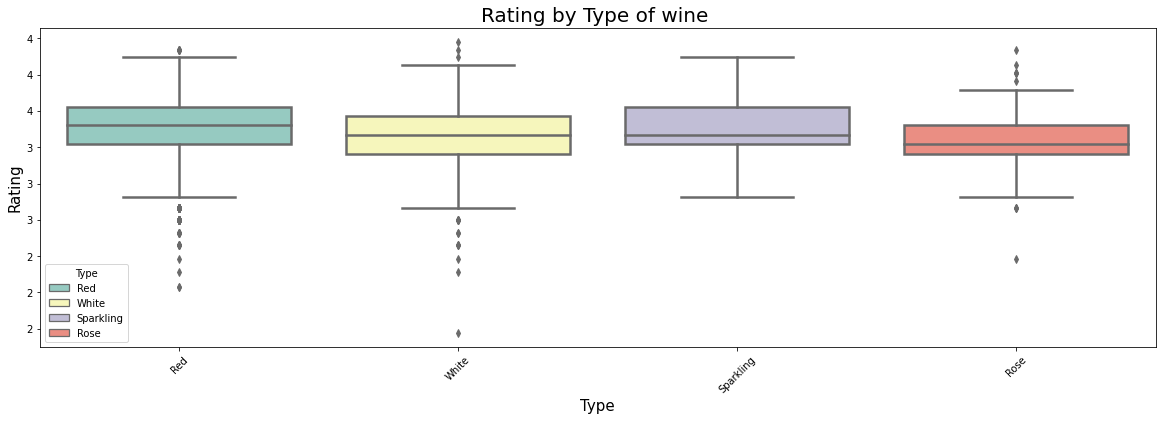

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
graph = sns.boxplot(x='Type', y=np.log(wine['Rating']),
                    data=wine,
                    palette="Set3",  hue="Type", linewidth=2.5, dodge=False)
graph.set_title("Rating by Type of wine ", fontsize=20)
graph.set_xlabel("Type", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


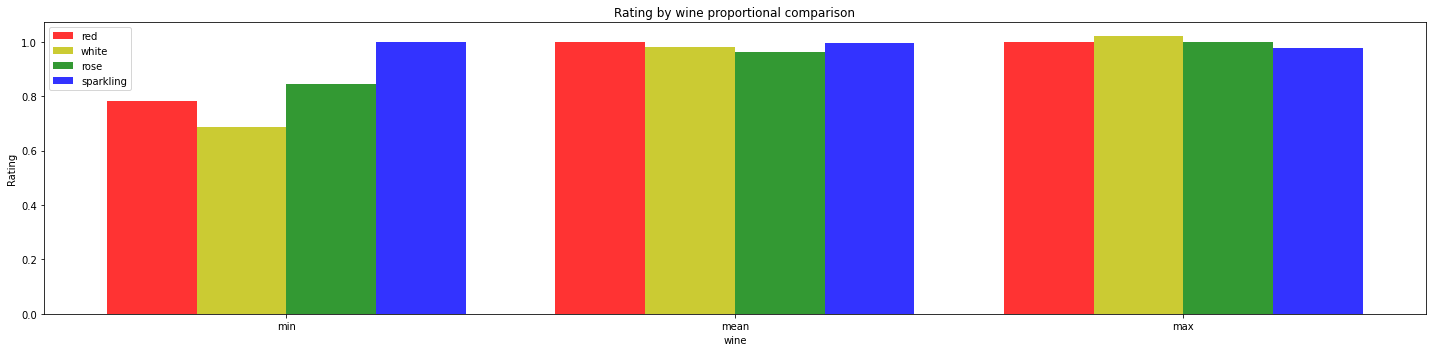

In [ ]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
red_test = (test.loc['min','Rating']/test4.loc['min','Rating'],test.loc['mean','Rating']/test.loc['mean','Rating'],test.loc['max','Rating']/test.loc['max','Rating'])
white_test = (test2.loc['min','Rating']/test4.loc['min','Rating'],test2.loc['mean','Rating']/test.loc['mean','Rating'],test2.loc['max','Rating']/test.loc['max','Rating'])
rose_test = (test3.loc['min','Rating']/test4.loc['min','Rating'],test3.loc['mean','Rating']/test.loc['mean','Rating'],test3.loc['max','Rating']/test.loc['max','Rating'])
sparkling_test = (test4.loc['min','Rating']/test4.loc['min','Rating'],test4.loc['mean','Rating']/test.loc['mean','Rating'],test4.loc['max','Rating']/test.loc['max','Rating'])


# create plot
plt.figure(figsize=(20,5))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, red_test, bar_width,
alpha=opacity,
color='r',
label='red')

rects2 = plt.bar(index + bar_width, white_test, bar_width,
alpha=opacity,
color='y',
label='white')

rects3 = plt.bar(index + bar_width+ bar_width, rose_test, bar_width,
alpha=opacity,
color='g',
label='rose')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, sparkling_test, bar_width,
alpha=opacity,
color='b',
label='sparkling')

plt.xlabel('wine')
plt.ylabel('Rating')
plt.title('Rating by wine proportional comparison')
plt.xticks(index+bar_width*1.5, ('min', 'mean', 'max'))

plt.legend()

plt.tight_layout()
plt.show()

So far, we saw that Red wine and Sparkling have better reviews from users, we also saw that these two are more expensive than the other.<br> So maybe there is a correlation between the price and the rating.   
<br> That's what we want to observe in this section

<AxesSubplot:>

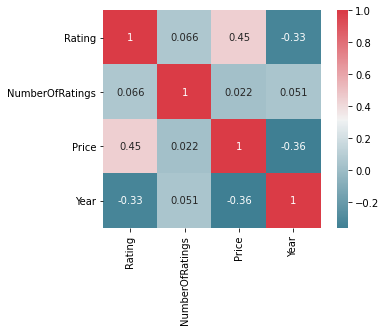

In [ ]:
import seaborn as sns

corr = wine.corr()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)



We can observe a correlation of 0.45 between the price and the rating, that is not significant but relevant. There is a relation between these two features according to the heatmap above. <br>
If we plot the __Price__ explained by the __Rating__ in a scatter plot, we will have a better view.  

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


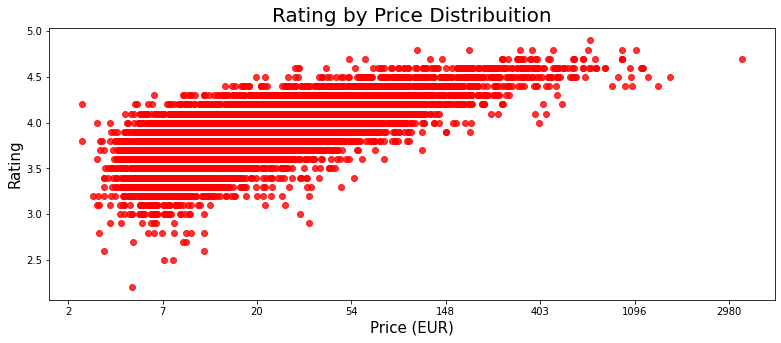

In [ ]:
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(wine['Price']), y='Rating', 
                    data=wine, fit_reg=False, color='red')
graph.set_title("Rating by Price Distribuition", fontsize=20)
graph.set_xlabel("Price (EUR)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

That confirm what we observed earlier, we can observe a clear trend in the distribution of __Rating__ by __Price__ <br>
(This plot shows us also that there are a lot of wines with 4+ rating just for 7€ and 4.4+ rating for around 20€, so this is a good news)


Now from the heatmap above, we could also observe an anti-correlation between the __Price__ and the __Year__ and the __Rating__ and the __Year__
<br>That is something we can take a look in order to understand how the __Rating__ is distributed among the dataset 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


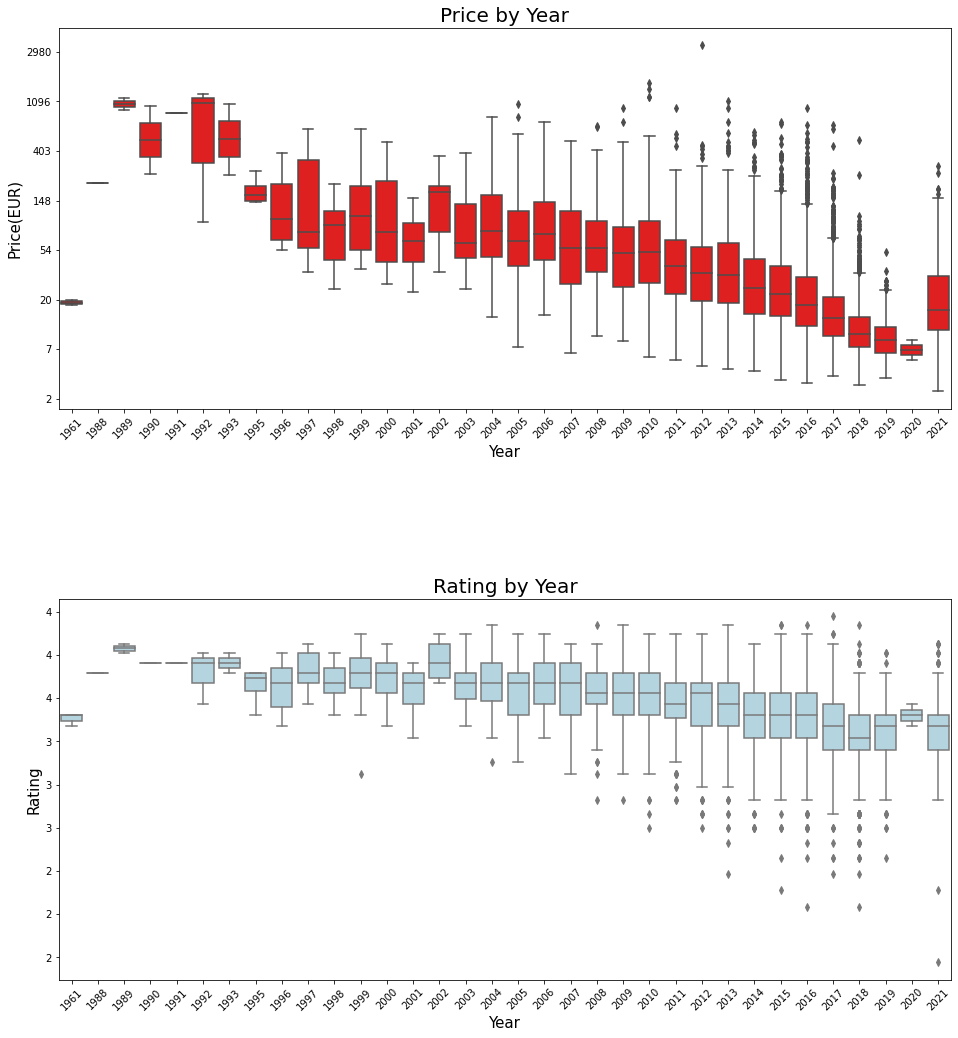

In [ ]:
plt.figure(figsize=(16,18))

plt.subplot(3,1,1)
graph = sns.boxplot(x='Year', y=np.log(wine['Price']),
                    data=wine,
                    color='red')
graph.set_title("Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price(EUR)", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.subplot(3,1,2)
graph = sns.boxplot(x='Year', y=np.log(wine['Rating']),
                    data=wine,
                    color='lightblue')
graph.set_title("Rating by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.subplots_adjust(hspace = 0.5, top = 1.3)

plt.show()

According to these two plots, it is now clear that the age of the wine explain in part the Price distribution (if we don't consider the exeption of 2021 which does not exists)
<br> Moreover, these two plot shows us that the older is a Wine, than better is the Rating (but again, not always but there is a tendancy, that confirm the idea that there is good wine for all wallet & budget). 


***
Now, in this section we want to observe something interesting. Often, when you order something on Amazon, you take a look at the review.
<br>Of course, a review of 3.5+ or 4+ will influence your judgement in the moment of ordering. But, there is another feature that will affect the "legitimacy" of the review.
<br>If we have a product with __4.1__ rating with __5__ number of ratings against a __3.8__ rating with __35000__ number of ratings, which product will keep our attention ?
<br>Remember that this dataset is from the Vivino App and the main reason of Vivino App to exist is to give information about quality of wine to users. 
<br>Then, obviously, the Number of Ratings is an really important feature.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


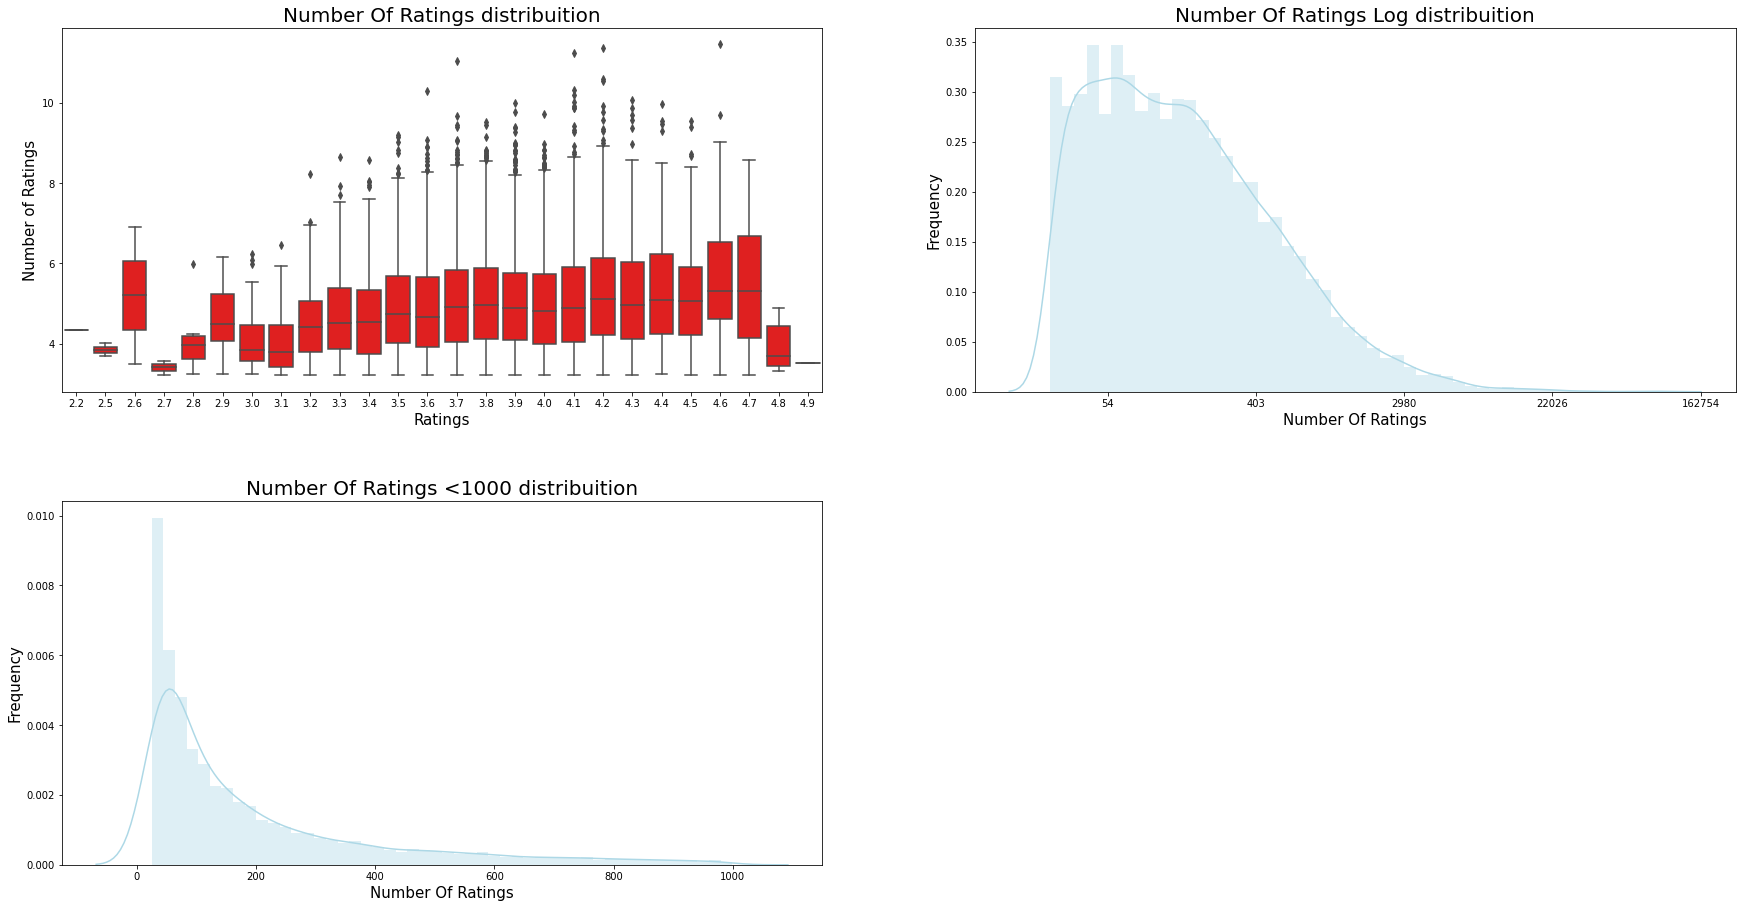

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
graph = sns.boxplot(y=np.log(wine['NumberOfRatings']), x='Rating', data=wine,color='red')
graph.set_title("Number Of Ratings distribuition", fontsize=20) 
graph.set_xlabel("Ratings", fontsize=15)
graph.set_ylabel("Number of Ratings", fontsize=15) 

plt.subplot(2,2,2)
graph1 = sns.distplot(np.log(wine['NumberOfRatings']), color='lightblue')
graph1.set_title("Number Of Ratings Log distribuition", fontsize=20) 
graph1.set_xlabel("Number Of Ratings", fontsize=15) 
graph1.set_ylabel("Frequency", fontsize=15)
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplot(2,2,3)
graph = sns.distplot(wine[wine['NumberOfRatings']<1000]['NumberOfRatings'], color='lightblue')
graph.set_title("Number Of Ratings <1000 distribuition", fontsize=20)
graph.set_xlabel("Number Of Ratings", fontsize=15) 
graph.set_ylabel("Frequency", fontsize=15) 

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

##### What we observe from the last plot is that the Number of Ratings has an exponential distribution which means that there is a lot of wines with a LOW number of ratings.
##### In this dataset we have only the wines with AT LEAST 25 number of ratings (apparently because the company considers the rating of such wines is not accurate enough) 
##### BUT, for a large number of wines existing in Vivino App, there is no rating at all.
##### This is a big problem for these wines because they will not benefit the use of Vivino from customers because they do not have any quality review on the App. 
### Then the idea is to apply a Machine Learning method to predict rating of wines which have less than 25 reviews and give an information to customer about the quality of the wine. 
###### (Of course in real application we can imagine a note attached to rating which will precise that this rating is an approximation predicted by Artificial Intelligence based on the similar products)

## Feature Engineering

### Defintion of labels and features

In [ ]:
y = wine['Rating']
X = wine

X = X.drop(columns = ['Name'])
#One hot encoder
X = pd.get_dummies(X, columns=['Type'])

X

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type_Red,Type_Rose,Type_Sparkling,Type_White
0,France,Pomerol,Château La Providence,4.2,100,95.00,2011,1,0,0,0
1,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,1,0,0,0
2,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,1,0,0,0
3,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,1,0,0,0
4,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13829,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,0,1,0,0
13830,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,0,1,0,0
13831,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,0,1,0,0
13832,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2021,0,1,0,0


We use a Label Encoder to encode the string value into Integer in order to fit the model 

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X[['Country','Region', 'Winery']]
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

X

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type_Red,Type_Rose,Type_Sparkling,Type_White
0,10,574,791,4.2,100,95.00,2011,1,0,0,0
1,10,404,891,4.3,100,15.50,2017,1,0,0,0
2,16,748,2809,3.9,100,7.45,2015,1,0,0,0
3,16,61,559,3.5,100,8.72,2019,1,0,0,0
4,2,143,2289,3.9,100,29.15,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13829,10,393,1823,3.9,1750,9.36,2019,0,1,0,0
13830,10,267,2394,4.0,2046,12.85,2019,0,1,0,0
13831,10,267,1024,4.2,2990,16.47,2019,0,1,0,0
13832,22,809,509,3.5,9493,4.35,2021,0,1,0,0


In [ ]:
def normalizeFeatures(df):
    df_norm = df.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

#X = normalizeFeatures(X)

## Modeling

We want our model to predict Rating with different set of data based on the Number Of Ratings.
<br> Indeed, we want to check our model predictions on wines with low, high and mid Number of Ratings in order to compare.
<br> We define as "__low__", wines with a number of rating < 40 
<br> "__mid__" is for wines with a number of rating between 40 & 850 
<br> "__high__" is for wines with a number of rating > 850 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test['NumberOfRatings'].sort_values()[int(0.1*(len(X_test))):int(0.9*(len(X_test)))]

X_low_test = X_test[X_test['NumberOfRatings']<40]
y_low_test = X_low_test['Rating']
X_low_test = X_low_test.drop(['Rating'], axis = 1)

X_high_test = X_test[X_test['NumberOfRatings']>850]
y_high_test = X_high_test['Rating']
X_high_test = X_high_test.drop(['Rating'], axis = 1)

X_mid_test = X_test[X_test['NumberOfRatings']>40][X['NumberOfRatings']<850]
y_mid_test = X_mid_test['Rating']
X_mid_test = X_mid_test.drop(['Rating'], axis = 1)

X_train = X_train.drop(['Rating'], axis = 1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_ensemble = RandomForestRegressor(max_depth = 30, random_state = 0)
model_ensemble.fit(X_train, y_train)

y_low_predicted = model_ensemble.predict(X_low_test)
y_high_predicted = model_ensemble.predict(X_high_test)
y_mid_predicted = model_ensemble.predict(X_mid_test)

In [ ]:
df = pd.DataFrame()
df2 = pd.DataFrame()

df['low-Y-real']= y_low_test
df['low-Y-predicted']= np.around(y_low_predicted, decimals=1) 

df2['high-Y-real']= y_high_test
df2['high-Y-predicted']= np.around(y_high_predicted, decimals=1) 

y_moy = np.sum(y_low_test) / len(y_low_test)
R_squared_Low = 1 - (np.sum(np.square(y_low_test - y_low_predicted)) / np.sum(np.square(y_low_test - y_moy)))
R_squared_Low

y_moy = np.sum(y_mid_test) / len(y_mid_test)
R_squared_Mid = 1 - (np.sum(np.square(y_mid_test - y_mid_predicted)) / np.sum(np.square(y_mid_test - y_moy)))
R_squared_Mid

y_moy = np.sum(y_high_test) / len(y_high_test)
R_squared_High = 1 - (np.sum(np.square(y_high_test - y_high_predicted)) / np.sum(np.square(y_high_test - y_moy)))
R_squared_High
print("R2 Low :", R_squared_Low , " | R2 Mid : ", R_squared_Mid , " | R2 High : " , R_squared_High)

R2 Low : 0.4836852294726559  | R2 Mid :  0.635897638340997  | R2 High :  0.7290161393381416


For these type of application, the R squared score is not a relevant metric to look at. Indeed, we want to predict a rate with a step of 0.1.
<br> So, in order to observe the performance of our model, it is better to print the __Mean Absolute Error__ which will give us an idea on the performance level. 

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE of predictions with low NumberOfRatings:   ', mean_absolute_error(y_low_test, y_low_predicted))
print('MAE of predictions with high NumberOfRatings:  ', mean_absolute_error(y_high_test, y_high_predicted))
print('MAE of predictions with middle NumberOfRatings:', mean_absolute_error(y_mid_test, y_mid_predicted))

MAE of predictions with low NumberOfRatings:    0.17175336554345602
MAE of predictions with high NumberOfRatings:   0.118757185897436
MAE of predictions with middle NumberOfRatings: 0.1349770029540058


#### Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

kfolds = KFold(n_splits=6, shuffle=True, random_state=0)

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200,250,300]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_absolute_error',cv=kfolds)
ridge_regressor.fit(X_train,y_train)
print('Best ridge mae:', -ridge_regressor.best_score_)



/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28314e-22): result may not be accurate.
  overwrite_a=True).T
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.65291e-23): result may not be accurate.
  overwrite_a=True).T
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.6685e-22): result may not be accurate.
  overwrite_a=True).T
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.43864e-23): result may not be accurate.
  overwrite_a=True).T
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.08784e-21): result may not be accurate.
  overwrite_a=True).T
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarnin

In [ ]:
y_low_predicted = ridge_regressor.predict(X_low_test)
y_high_predicted = ridge_regressor.predict(X_high_test)
y_mid_predicted = ridge_regressor.predict(X_mid_test)

print('MAE of predictions with low NumberOfRatings:   ', mean_absolute_error(y_low_test, y_low_predicted))
print('MAE of predictions with high NumberOfRatings:  ', mean_absolute_error(y_high_test, y_high_predicted))
print('MAE of predictions with middle NumberOfRatings:', mean_absolute_error(y_mid_test, y_mid_predicted))

MAE of predictions with low NumberOfRatings:    0.21925243443131534
MAE of predictions with high NumberOfRatings:   0.19669341111882535
MAE of predictions with middle NumberOfRatings: 0.19538077034950016


__Random Forest Regressor__ shows significantly higher result than __Ridge regression__ model, we will keep Random Forest Regressor results to conclude the purpose.  

With an accuracy of __0.17__ for __low__ Number of Ratings, __0.11__ for __high__ Number of Ratings and __0.13__ for __mid__ Number of Ratings we can say, as expected, that rating of wines with __low__ Number of Ratings is less representative, and accuracy of model is lower
<br> But, in global, the accuracy is good enough to give an idea to the customer. Obviously, it can be improved by bigger dataset size and more features which has Vivino company.

To conclude, we can say that the problem of reviews distribution exists in many other applications (Amazon, Uber Eats etc.). 
<br> It consists in the fact that the user is often afraid of choosing a product or service that no one has ever bought before. 
Due to this, many businesses lose a lot of money because of the lack of rating distribution of customers by product.
<br> __With this project, we show that Machine Learning can be a solution to this problem of reviews distribution and it can save a lot of money for these businesses__